In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.columns
#review of columns in the dataset

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
drop_cols = ['race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient','number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']
#DATA CLEANING and removing columns that will not be used for the analysis

In [6]:
df.drop(drop_cols, inplace =True, axis=1)

In [7]:
df.head()
#review of the table without the uncessary columns 

,encounter_id,patient_nbr,number_emergency,max_glu_serum,A1Cresult,readmitted
0,2278392,8222157,0,None,None,NO
1,149190,55629189,0,None,None,>30
2,64410,86047875,0,None,None,NO
3,500364,82442376,0,None,None,NO
4,16680,42519267,0,None,None,NO


In [8]:
df1= df[df['A1Cresult'] !='None']
df1
#analyzing A1c results and removing all values that were not measured and contains 'none' in the output

,encounter_id,patient_nbr,number_emergency,max_glu_serum,A1Cresult,readmitted
26,236316,40523301,0,None,>7,NO
74,955884,93196251,0,None,>7,>30
98,1257282,84488562,0,None,>8,NO
103,1270524,67897251,0,None,Norm,NO
107,1455252,96440301,0,None,Norm,>30
...,...,...,...,...,...,...
101749,443816024,106392411,1,None,Norm,NO
101751,443835140,175326800,0,None,Norm,NO
101754,443842016,183087545,0,None,>7,>30
101755,443842022,188574944,1,None,>8,>30


In [9]:
df2= df1[df1['max_glu_serum'] !='None']
df2
#analyzing and cleaning data to remove all values in max glucose serum that contain 'none'

,encounter_id,patient_nbr,number_emergency,max_glu_serum,A1Cresult,readmitted
162,2521974,80499960,0,>200,Norm,<30
192,2595612,89193870,0,>300,>8,>30
460,4084524,76959585,0,>300,>8,>30
593,4804968,114960726,0,>300,>8,NO
696,5319174,87847776,0,>200,>7,NO
...,...,...,...,...,...,...
100386,424989572,103832127,6,>300,>8,<30
100493,426670736,101755908,0,>200,>8,NO
100578,427875206,90285327,1,>300,>8,NO
101029,433822712,104106645,0,>300,>8,>30


In [10]:
df2.groupby(['max_glu_serum']).mean()
#analyzing max glucose serum and number of emergency room visits

,encounter_id,patient_nbr,number_emergency
max_glu_serum,,,
>200,1.195579e+08,6.701257e+07,0.014085
>300,1.838206e+08,8.027103e+07,0.341085
Norm,1.514077e+08,6.938001e+07,0.051020


In [11]:
df2.groupby(['A1Cresult']).mean()
#analyzing A1c results and number of emergency room visits

,encounter_id,patient_nbr,number_emergency
A1Cresult,,,
>7,1.268960e+08,7.174254e+07,0.047619
>8,1.694018e+08,7.659370e+07,0.265537
Norm,1.562217e+08,6.612468e+07,0.000000


In [12]:
df2.groupby(['readmitted']).mean()
#analyzing readmission and number of emergency room visits 

,encounter_id,patient_nbr,number_emergency
readmitted,,,
<30,1.694913e+08,7.576391e+07,0.194444
>30,1.446926e+08,7.878011e+07,0.294964
NO,1.693128e+08,6.694439e+07,0.016260


<AxesSubplot:xlabel='max_glu_serum', ylabel='number_emergency'>

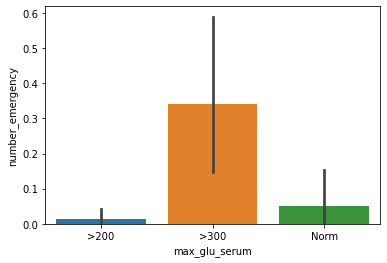

In [41]:
sns.barplot(x='max_glu_serum', y='number_emergency', data=df2)
#created a barplot based on max glucose serum and number of emergency room visits

<AxesSubplot:xlabel='A1Cresult', ylabel='number_emergency'>

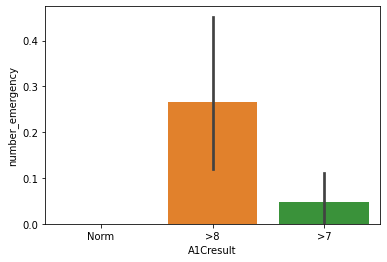

In [42]:
sns.barplot(x='A1Cresult', y='number_emergency', data=df2)
#created a barplot based on A1c result and number of emergency room visits

In [ ]:
#Conslusion
#Based on the A1c Results and Max Glucose levels, appaers people with an of A1c > 8 or  max glucose levels >300 have more emergency room visits compared to those with A1c>7 or normal glucose serum ranges. 
